<a href="https://colab.research.google.com/github/jonnie763/DATA-690-WANG/blob/master/Jonathan_Rius_Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.Country Analysis- Data Cleanse**

In [91]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy
plt.rcParams['figure.figsize'] = 25, 12


In [92]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=233,336,299,&s=NGDP_RPCH,&sy=2015&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1") # Webscrape IMF site, great site for economic data 
df = df[0]
df


,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,2016,2017,2018,2019,2020
0,Colombia,"Gross domestic product, constant prices",Percent change,NaN,NaN,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,"Gross domestic product, constant prices",Percent change,NaN,NaN,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,"Gross domestic product, constant prices",Percent change,NaN,NaN,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


In [93]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"]) # Data Cleaning, don't need these columns 
df

,Country,2015,2016,2017,2018,2019,2020
0,Colombia,2.956,2.087,1.359,2.515,3.260,-8.182
1,Guyana,0.687,3.807,3.734,4.441,5.353,26.205
2,Venezuela,-6.221,-17.040,-15.671,-19.621,-35.000,-25.000


In [94]:
Years= list(df) # Listing years for dataframe piviot, take out Country with remove 
Years

['Country', '2015', '2016', '2017', '2018', '2019', '2020']

In [95]:
Years.remove('Country') 
Years

['2015', '2016', '2017', '2018', '2019', '2020']

In [96]:
long_df_Countries = df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=Years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="GDP Percentage Growth"         # The new column name for the value
)

long_df_Countries

,Country,Years,GDP Percentage Growth
0,Colombia,2015,2.956
1,Guyana,2015,0.687
2,Venezuela,2015,-6.221
3,Colombia,2016,2.087
4,Guyana,2016,3.807
5,Venezuela,2016,-17.040
6,Colombia,2017,1.359
7,Guyana,2017,3.734
8,Venezuela,2017,-15.671
9,Colombia,2018,2.515


Text(1, 20, 'Six of seven negative percentages belong to Venzuela.')

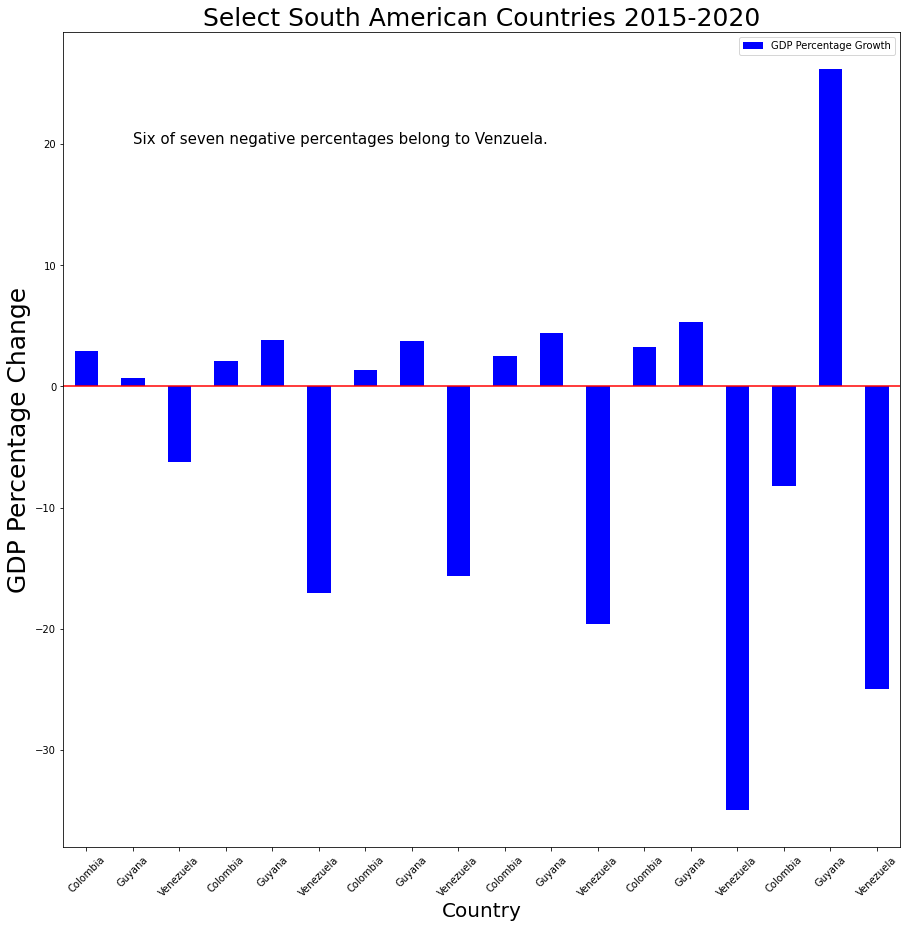

In [131]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel("GDP Percentage Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Country",fontname="Arial", fontsize=20)
ax.set_title("Select South American Countries 2015-2020",fontname="Arial", fontsize=25)
long_df_Countries.plot(kind='bar',x='Country',y='GDP Percentage Growth', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax) # Graph Long df above, comparing countries 

plt.axhline(y=0, color='r')                                                                                                           # X- axis gives graph cleaner look 


ax.text(1, 20, r'Six of seven negative percentages belong to Venzuela.',fontsize=15)                                                 # Make note of comparions between countries 

In [193]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=PCPIPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")
df = df[0]
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,"Inflation, average consumer prices",Percent change,NaN,NaN,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [194]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"])
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,40.656,34.205,31.423,38.122,60.817,59.923,99.876,50.04,35.782,23.57,16.206,12.531,22.434,31.091,21.747,15.955,13.663,18.699,31.441,26.041,28.187,26.09,21.069,40.639,62.169,121.738,254.949,438.117,65374.082,19906.024,6500.0


In [195]:
years= list(df) # Listing years for dataframe piviot, take out Country with remove
years

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [196]:
years.remove('Country') 
years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [197]:
long_df_Inflation = df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="Inflation Rate"                # The new column name for the value
)

long_df_Inflation

,Country,Years,Inflation Rate
0,Venezuela,1990,40.656
1,Venezuela,1991,34.205
2,Venezuela,1992,31.423
3,Venezuela,1993,38.122
4,Venezuela,1994,60.817
5,Venezuela,1995,59.923
6,Venezuela,1996,99.876
7,Venezuela,1997,50.040
8,Venezuela,1998,35.782
9,Venezuela,1999,23.570


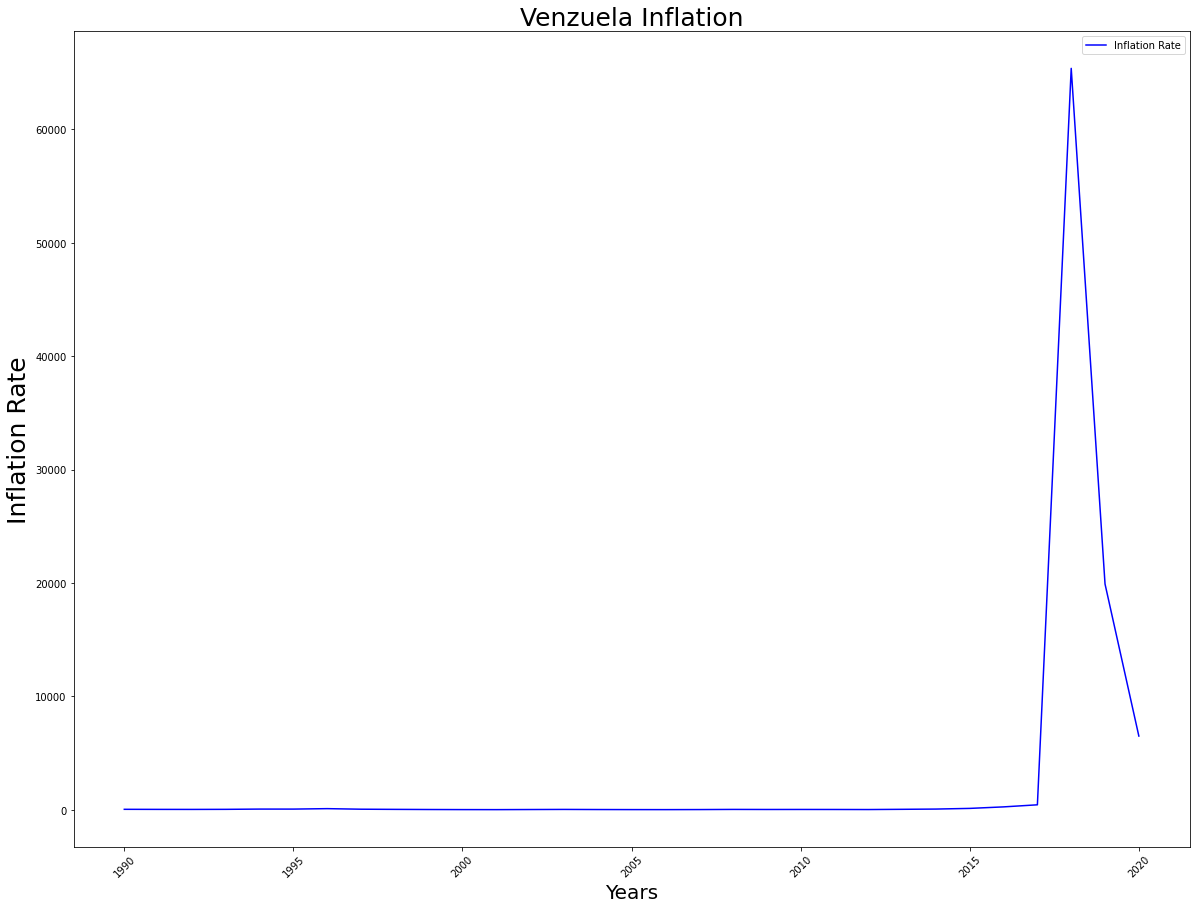

In [202]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation",fontname="Arial", fontsize=25)
long_df_Inflation.plot(kind='line',x='Years',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)




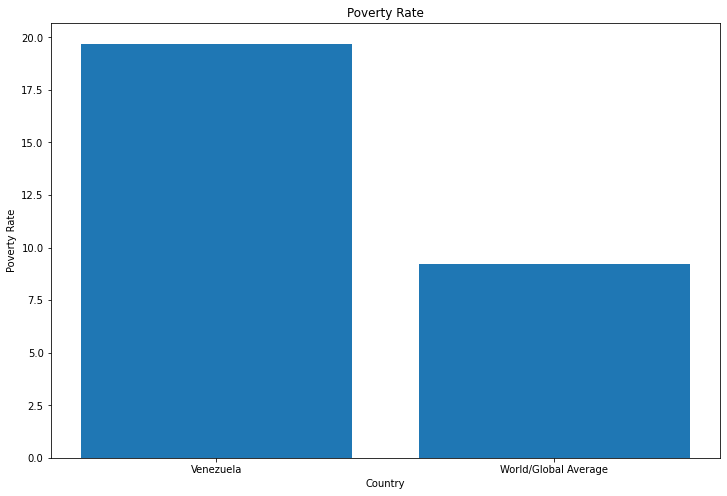

In [23]:
Poverty_Rate  = [19.7,9.2]                       #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"]  # Made my own dataframe, only needed two data points, no need for web scarping and csv 
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

In [204]:
df= pd.read_html("https://www.imf.org/en/Publications/WEO/weo-database/2020/October/weo-report?c=299,&s=TMG_RPCH,&sy=1990&ey=2020&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1")
df = df[0]
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,Volume of Imports of goods,Percent change,NaN,NaN,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [205]:
df=df.drop(columns=['Subject Descriptor',"Units","Scale","Country/Series-specific Notes"])
df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Venezuela,2.447,25.24,4.752,-11.738,-28.4,31.011,-15.485,62.421,14.298,-11.449,14.985,15.789,-28.215,-23.457,66.582,38.777,40.169,31.575,3.187,-21.528,-6.101,13.803,24.948,-9.687,-18.532,-23.102,-50.061,-34.651,-10.074,-33.14,-14.796


In [207]:
Years= list(df) 
Years

['Country',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [208]:
Years.remove('Country') 
Years

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [209]:
long_df = df.melt(
    id_vars="Country",                         # Unique identifier
    value_vars=Years,                          # List of columns to be melted to a single variable
    var_name="Years",                          # The new column name for the variable
    value_name="Imports Growth Rate"           # The new column name for the value
)

long_df

,Country,Years,Imports Growth Rate
0,Venezuela,1990,2.447
1,Venezuela,1991,25.240
2,Venezuela,1992,4.752
3,Venezuela,1993,-11.738
4,Venezuela,1994,-28.400
5,Venezuela,1995,31.011
6,Venezuela,1996,-15.485
7,Venezuela,1997,62.421
8,Venezuela,1998,14.298
9,Venezuela,1999,-11.449


In [210]:
start = '2012'
end = '2020'

l = list(long_df['Years']) #ordered list of names
subl = l[l.index(start):l.index(end)+1] #list of names between the start and end

long_df[long_df['Years'].isin(subl)] #filter dataset for list of names
long_df=long_df[long_df['Years'].isin(subl)] #filter dataset for list of names
long_df

,Country,Years,Imports Growth Rate
22,Venezuela,2012,24.948
23,Venezuela,2013,-9.687
24,Venezuela,2014,-18.532
25,Venezuela,2015,-23.102
26,Venezuela,2016,-50.061
27,Venezuela,2017,-34.651
28,Venezuela,2018,-10.074
29,Venezuela,2019,-33.140
30,Venezuela,2020,-14.796


Text(3, 4, 'U.S Sanctions')

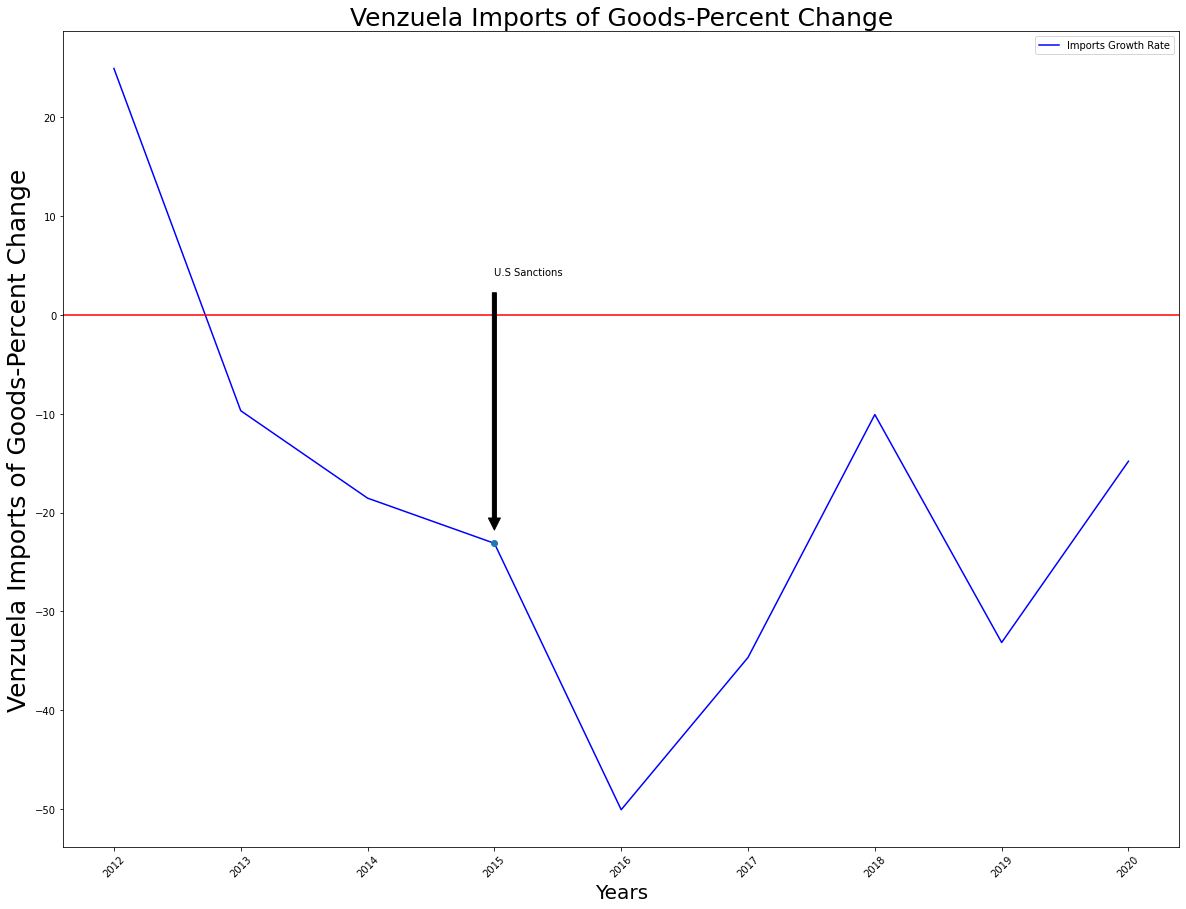

In [211]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


plt.axhline(y=0, color='r') 


ax.plot([3], [-23.102], 'o')
ax.annotate('U.S Sanctions', xy=(3, -23.102), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


In [237]:
df = pd.read_csv("/content/DP_LIVE_25102020061630321.csv") # Read csv using this cose, print df
df  

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,EDUEXP,TRY,USD_STUDENT,A,2015,17555.235,NaN
1,AUT,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
2,CZE,EDUEXP,TRY,USD_STUDENT,A,2015,10890.714,NaN
3,CZE,EDUEXP,TRY,USD_STUDENT,A,2016,NaN,M
4,FRA,EDUEXP,TRY,USD_STUDENT,A,2015,16144.755,NaN
...,...,...,...,...,...,...,...,...
179,SAU,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
180,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,8610.292,NaN
181,SVN,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2016,NaN,M
182,ZAF,EDUEXP,EARLYCHILDEDU,USD_STUDENT,A,2015,NaN,M


In [238]:
df.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df=df.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df

,LOCATION,Value
0,AUT,17555.235
1,AUT,NaN
2,CZE,10890.714
3,CZE,NaN
4,FRA,16144.755
...,...,...
179,SAU,NaN
180,SVN,8610.292
181,SVN,NaN
182,ZAF,NaN


In [239]:
# sort - ascending order
import pandas as pd
 

df.sort_values(by=['Value'], inplace=True)
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
62,IDN,3764.700
68,GRC,4094.526
...,...,...
178,SAU,NaN
179,SAU,NaN
181,SVN,NaN
182,ZAF,NaN


In [240]:
df.drop_duplicates(subset=['LOCATION'])
df=df.drop_duplicates(subset=['LOCATION'])
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


In [241]:
df.dropna(axis='rows')
df=df.dropna(axis='rows')
df

,LOCATION,Value
168,IDN,169.575
126,MEX,2684.695
146,TUR,3591.292
68,GRC,4094.526
170,ISR,4185.221
100,CZE,4953.118
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133


In [242]:
df.describe()

,Value
count,36.000000
mean,8783.724667
std,5687.274080
min,169.575000
25%,5437.678750
50%,7037.965500
75%,10362.087500
max,30003.244000


In [243]:
Spending_df=df.tail(30)
Spending_df

,LOCATION,Value
84,COL,5040.455
176,RUS,5061.743
172,LVA,5313.316
174,LTU,5479.133
138,SVK,5811.212
156,CHL,5909.571
116,IRL,6105.903
134,POL,6221.502
118,ITA,6249.264
164,EST,6513.922


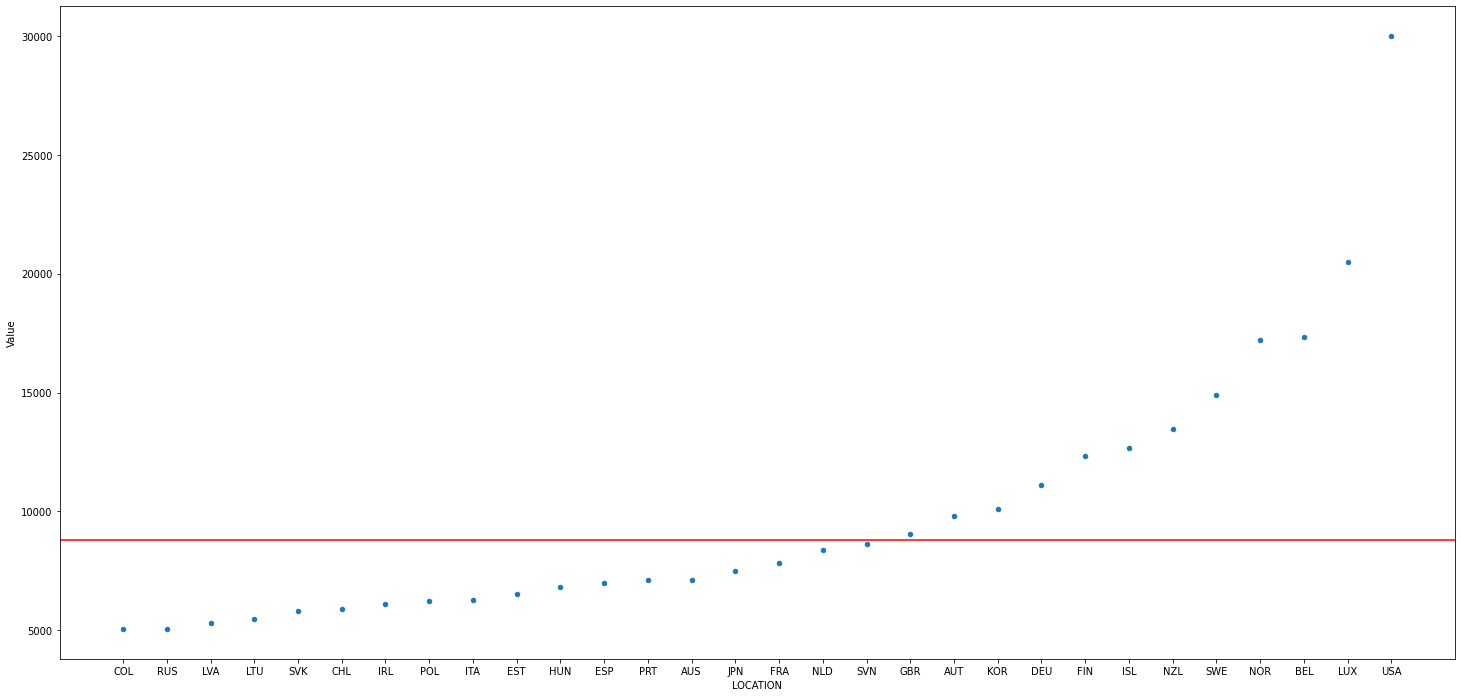

In [244]:
Spending_df.plot(kind='scatter',x='LOCATION',y='Value')
plt.axhline(y=8783.724666666667, color='r')

In [220]:
df.tail(12)
df=df.tail(12)
df

,LOCATION,Value
148,GBR,9048.388
94,AUT,9824.383
72,KOR,10108.948
108,DEU,11121.506
104,FIN,12332.219
40,ISL,12670.652
130,NZL,13465.562
142,SWE,14917.142
132,NOR,17224.679
44,BEL,17320.185


In [222]:
Top_12 = list(df["LOCATION"]) # Listing Top 12 spending countries on education, see its wealth 
Top_12

['GBR',
 'AUT',
 'KOR',
 'DEU',
 'FIN',
 'ISL',
 'NZL',
 'SWE',
 'NOR',
 'BEL',
 'LUX',
 'USA']

In [223]:
df2 = pd.read_csv("/content/DP_LIVE_25102020054342653.csv") 
df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2=df2.drop(columns=['INDICATOR',"SUBJECT","MEASURE", 'FREQUENCY','TIME',"Flag Codes"])
df2.sort_values(by=['Value'], inplace=True)
df2.drop_duplicates(subset=['LOCATION'])
df2=df2.drop_duplicates(subset=['LOCATION'])
df2
df2 = df2.set_index( "LOCATION", drop = False) 
df2.loc[Top_12]
Top_12_GRAPH=df2.loc[Top_12]
Top_12_GRAPH

,LOCATION,Value
LOCATION,,
GBR,GBR,42522.183841
AUT,AUT,49955.456118
KOR,KOR,37907.460937
DEU,DEU,47622.331224
FIN,FIN,42501.611531
ISL,ISL,48856.560901
NZL,NZL,37403.074775
SWE,SWE,49116.236552
NOR,NOR,58917.288330


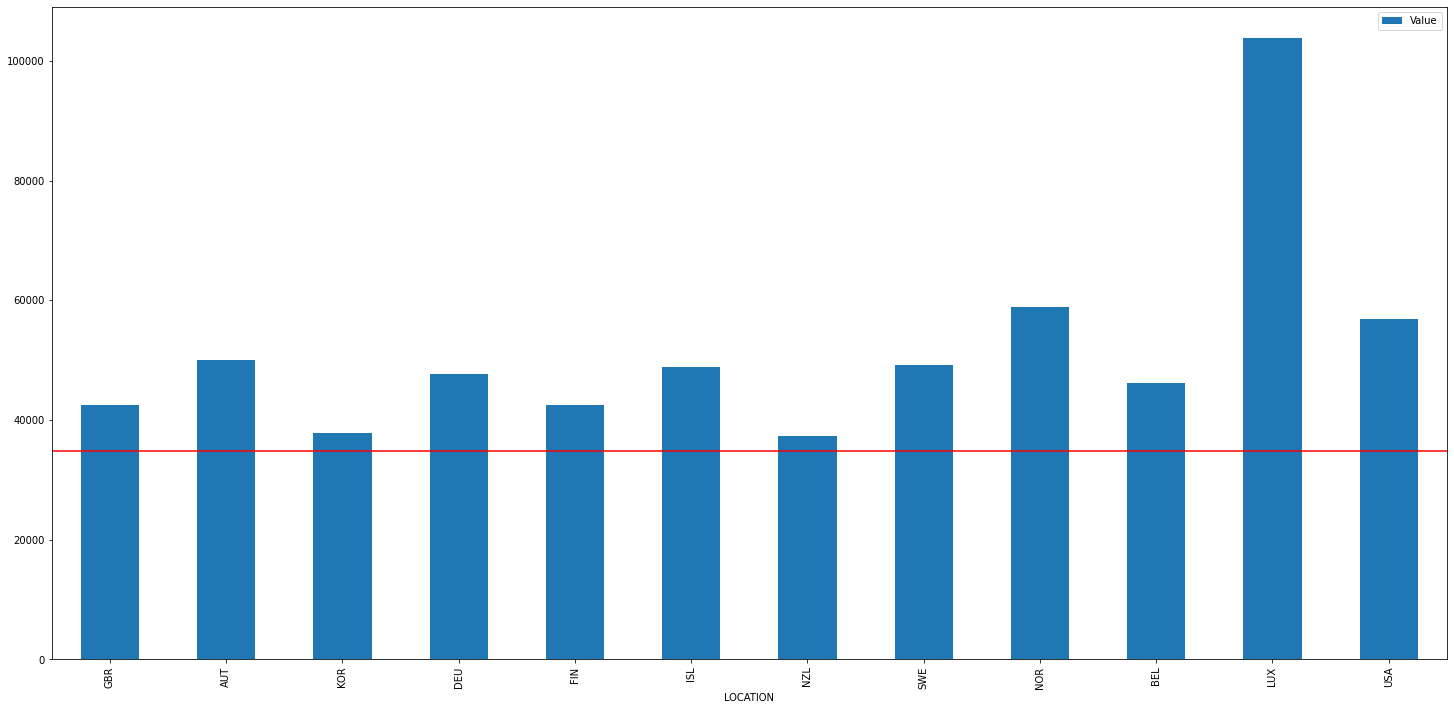

In [224]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')
plt.axhline(y=34819.430959, color='r')

##**2. Background information-Venzuela**
# **Venzuela has an interesting history. Present day and historic Venzeula has many points of analysis. One can approach Venzuela, from a political or historical perspective. Others can choose to explore it from a economic or governmental perspective. What I think is most interesting is approaching it from a data perspective, and to infer and answer important economic, poltical, and governmental questions from there. Below are other interesting things about Venzuela.**


*   List item
*   List item
*   List item
*   List item
*   List item

##**3.What are the economic deficiencies?**





##HyperInflation

Text(3, 20000, 'HyperInflation')

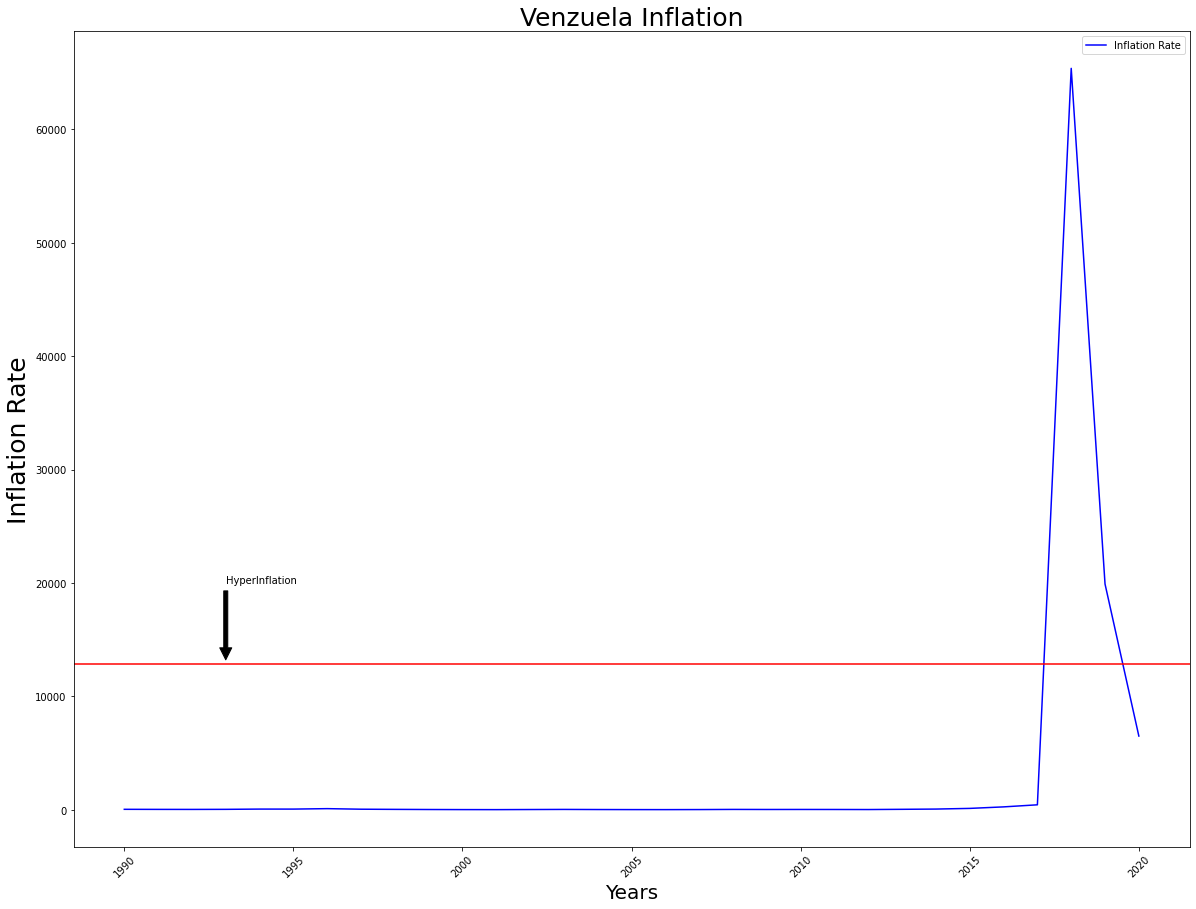

In [245]:
fig, ax = plt.subplots(figsize=(20,15))                          # I made the graph rather large, I like graphs large 
ax.set_ylabel("Inflation Rate",fontname="Arial", fontsize=25)    # I made the font rather large, I like font large 
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Venzuela Inflation",fontname="Arial", fontsize=25)
long_df_Inflation.plot(kind='line',x='Years',y='Inflation Rate', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax) # Graphing based saved dataframe, inflation 


plt.axhline(y= 12874.63, color='r')                              # Show hyperinflation line 

ax.annotate('HyperInflation', xy=(3, 12874.63), xytext=(3, 20000), # Show hyperinflation line 
            arrowprops=dict(facecolor='black', shrink=0.05))

##Shrinking Economy 

Text(1, 17, 'Neighboring countries mostly growing, Venzuela has shrinking economy.')

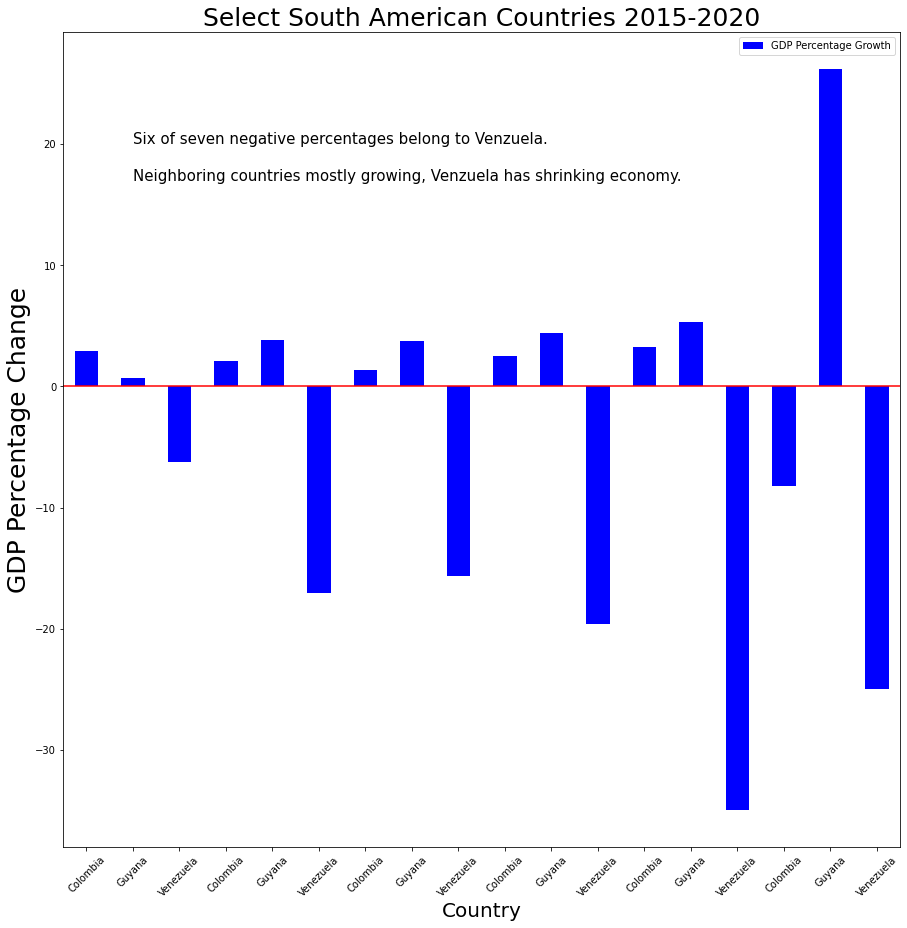

In [253]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel("GDP Percentage Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Country",fontname="Arial", fontsize=20)
ax.set_title("Select South American Countries 2015-2020",fontname="Arial", fontsize=25)
long_df_Countries.plot(kind='bar',x='Country',y='GDP Percentage Growth', legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)

plt.axhline(y=0, color='r')                                                                            # Have x-axis makes things cleaner 

ax.text(1, 20, r'Six of seven negative percentages belong to Venzuela.',fontsize=15)                   # Make notes of data within the graph, might need years similar to assignment 7 combined plots 
ax.text(1, 17, r'Neighboring countries mostly growing, Venzuela has shrinking economy.',fontsize=15)

##High Poverty Rate 

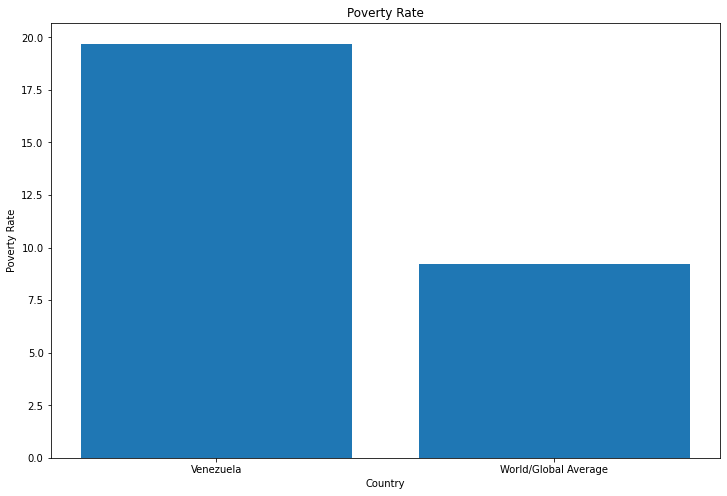

In [254]:
Poverty_Rate  = [19.7,9.2]                       #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Venezuela",	"World/Global Average"]  # Made my own dataframe, only needed two data points, no need for web scarping and csv 
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(Country, Poverty_Rate)
ax.set_title("Poverty Rate")
ax.set_xlabel("Country")
ax.set_ylabel("Poverty Rate")

fig.show()

##Decline of International Trade 

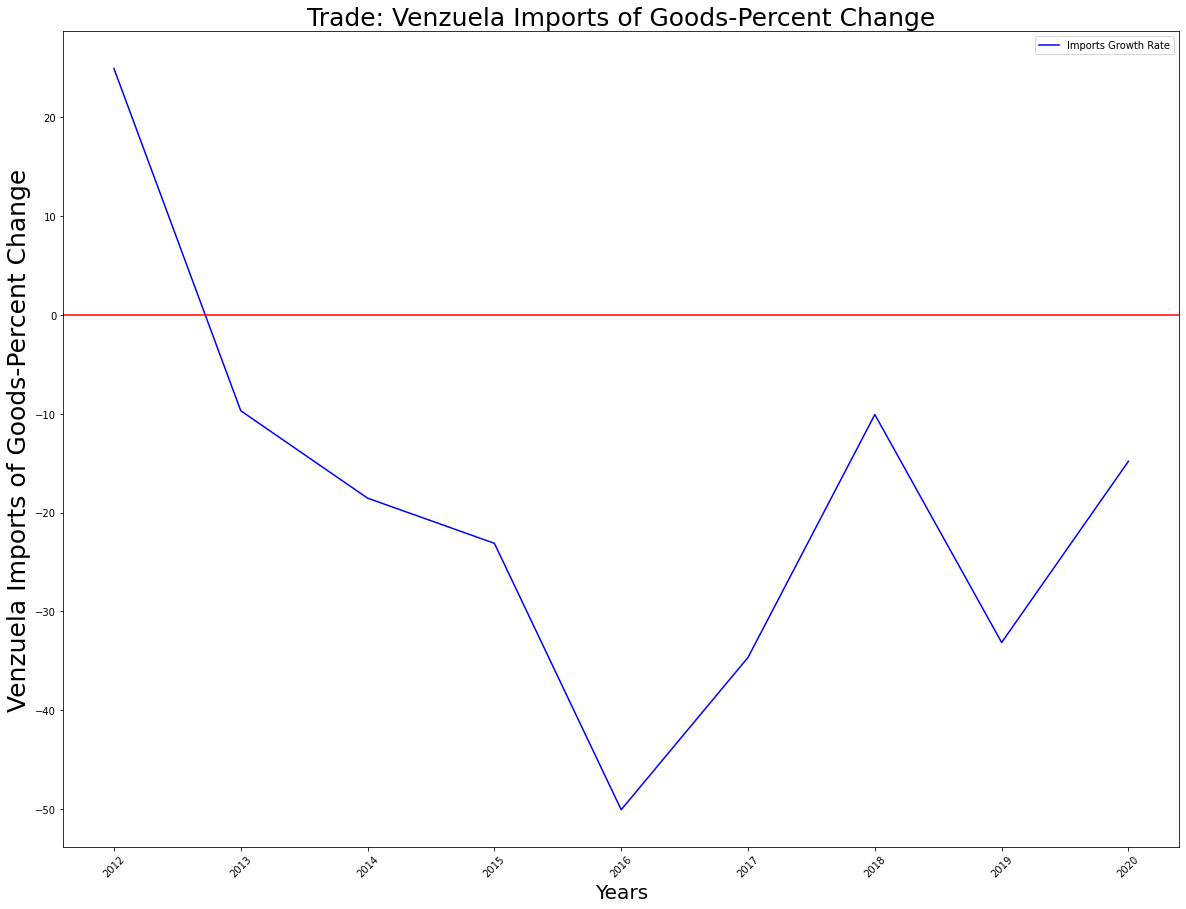

In [248]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Trade: Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)
plt.axhline(y=0, color='r') 



**Sanctions hurt imports for Venzuela.**

##**4. Solutions for economic problem areas.** 

##Solution 1:Attempt to Remove Sanctions 

Text(3, 4, 'U.S Sanctions')

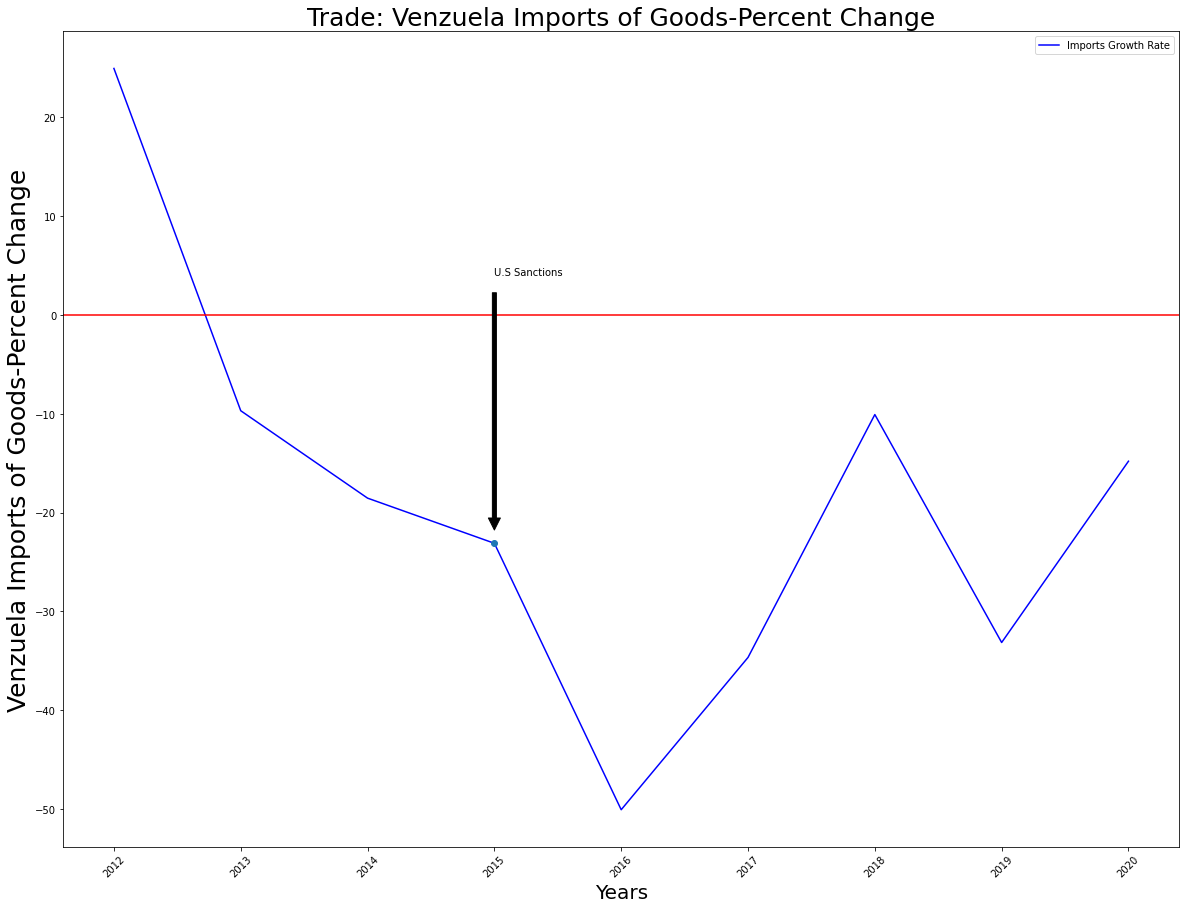

In [249]:
import numpy as np
fig, ax = plt.subplots(figsize=(20,15))
ax.set_ylabel("Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
ax.set_xlabel("Years",fontname="Arial", fontsize=20)
ax.set_title("Trade: Venzuela Imports of Goods-Percent Change",fontname="Arial", fontsize=25)
long_df.plot(kind="line",x="Years",y="Imports Growth Rate", legend= "GDP Percentage Growth", color="b", rot=45, ax = ax)


plt.axhline(y=0, color='r') 


ax.plot([3], [-23.102], 'o')                                   # I thought it was important to show when Sanctions started taking place 
ax.annotate('U.S Sanctions', xy=(3, -23.102), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


##Solution 2:Reduce government spending to reduce hyper-inflation (Show correlation) 

##Solution 3:Diversify economy beyond oil exports.

([<matplotlib.patches.Wedge at 0x7f33dece8f28>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Petrolum'),
  Text(0.6741976190487652, 0.8691706221847216, 'Gold'),
  Text(0.33991851505592985, 1.0461622260061638, 'Alcohol'),
  Text(0.1378663750450849, 1.0913261944221482, 'Other')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85.00%'),
  Text(0.367744155844781, 0.47409306664621176, '9.00%'),
  Text(0.18541009912141626, 0.5706339414579075, '2.00%'),
  Text(0.07519984093368266, 0.5952688333211716, '4.00%')])

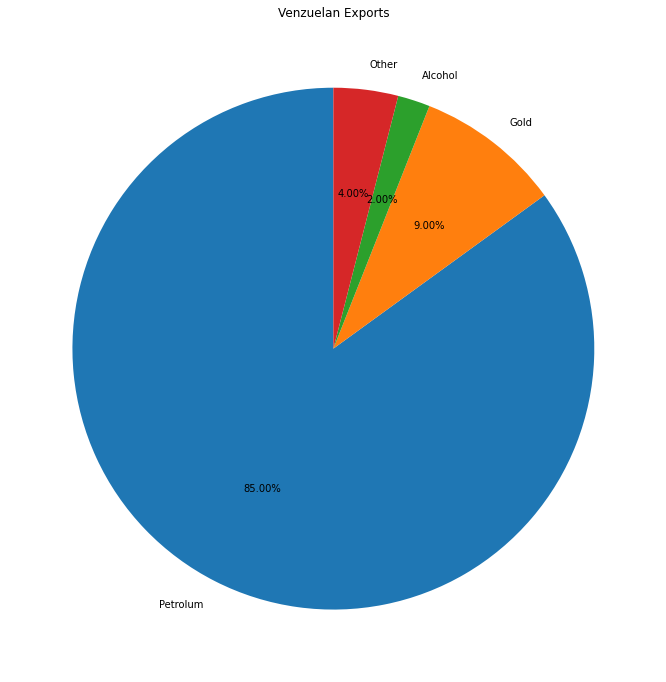

In [250]:
#https://oec.world/en/profile/country/ven/
Exports = ['Petrolum', 'Gold', 'Alcohol', 'Other']
Export_1 = [85,9,2,4]

fig, ax = plt.subplots(figsize=(12,12)) # Made my own piechart , only needed a few data points, no need for web scarping and csv
ax.set_title("Venzuelan Exports")
ax.pie(x=Export_1, labels=Exports, startangle=90,autopct='%.2f%%')

##Solution 4: To diversify, increase educational investments. Wealthy nations make alot of investments in education so should Venzuela but within its limits.

Text(5, 20000, 'Lets look at top 12 spending countries on education to see wealth vs education, on the graph below')

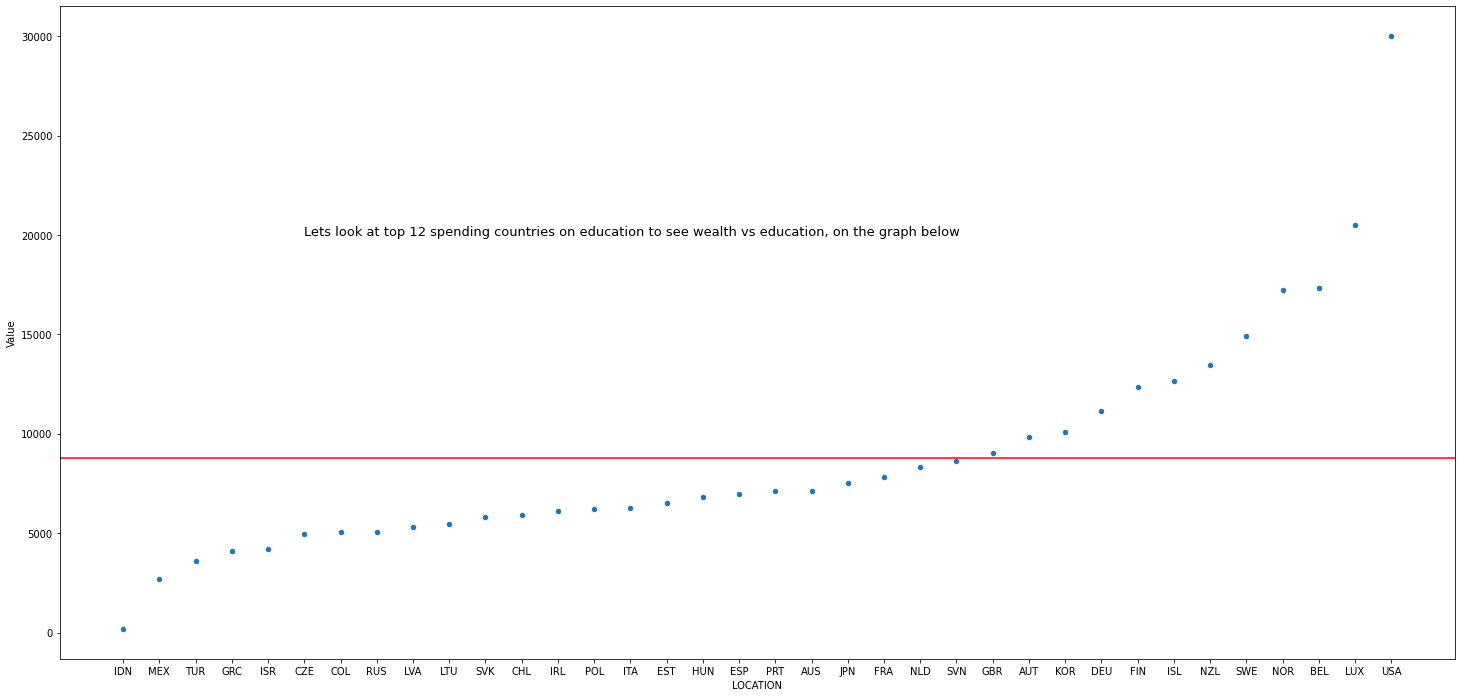

In [263]:
df.plot(kind='scatter',x='LOCATION',y='Value')
plt.axhline(y=8783.724666666667, color='r')                                                                                            #Average spending on education 


plt.text(5, 20000, r'Lets look at top 12 spending countries on education to see wealth vs education, on the graph below',fontsize=13) # Took top 12 countries, and checked their wealth below, on a bar graph 

                                


Text(0.5, 80000, 'The value of a good education shows, all 12 countries are above the mean gdp per capita of $34819.')

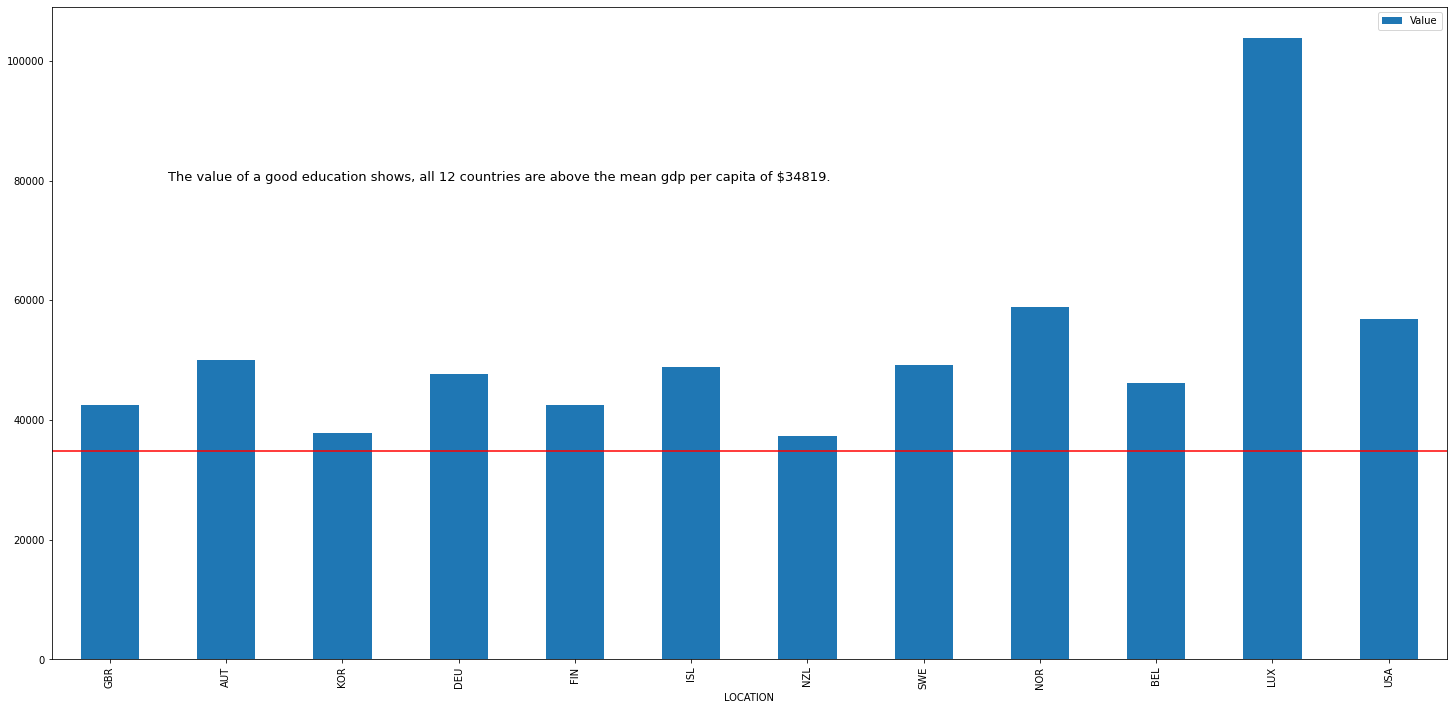

In [252]:
Top_12_GRAPH.plot(kind='bar',x='LOCATION',y='Value')
plt.axhline(y=34819.430959, color='r')                                                                                                  #Average GDP per capita on education 

plt.text(.5, 80000, r'The value of a good education shows, all 12 countries are above the mean gdp per capita of $34819.',fontsize=13) # Make Note of Data, based and above graph 

##**5. Conclusion**
**To be done later.**

##**6. References**
https://www.cia.gov/library/publications/the-world-factbook/geos/ve.html

https://www.focus-economics.com/countries/venezuela


https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017.


https://www.statista.com/statistics/371895/inflation-rate-in-venezuela/


https://data.worldbank.org/country/venezuela-rb

http://hdr.undp.org/en/content/expenditure-education-public-gdp

https://www.imf.org/external/index.htm

https://matplotlib.org/3.1.0/tutorials/text/text_intro.html